## Graph Creation and Drawing with Networkx
In general you can create:
- Graph (undirected, no multi edges)
- MultiGraph (undirected, multiple edges allowed betwenn a pair of nodes)
and their directed versions, i.e. DiGraph and MultiDiGraph.

In [1]:
import networkx as nx

#### Create and visualize a weighted DiGraph

[(1, 5, {'weight': 5}), (1, 2, {'weight': 6}), (2, 1, {'weight': 2}), (2, 6, {'weight': 5}), (2, 3, {'weight': 2}), (2, 4, {'weight': 2}), (3, 4, {'weight': 3}), (4, 3, {'weight': 5})]

n = 6 m = 8 

<class 'networkx.classes.digraph.DiGraph'>


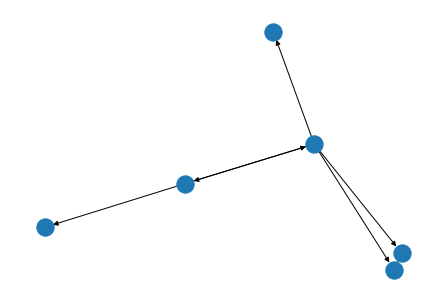

In [5]:
#Toy network, weighted and directed
G= nx.DiGraph()

#Add weighted arcs
G.add_edge(1,5, weight = 5)
G.add_edge(1,2, weight = 6)
G.add_edge(2,1, weight = 2)
G.add_edge(2,6, weight = 5)
G.add_edge(2,3, weight = 2)
G.add_edge(2,4, weight = 2)
G.add_edge(3,4, weight = 3)
G.add_edge(4,3, weight = 5)

#Inspect arc data and graph properties
print(G.edges(data=True))
print("\nn =", G.number_of_nodes(), "m =", G.number_of_edges(), "\n")
print(type(G))

#Draw a basic version of the graph
nx.draw(G)

#### Generate Random Graphs

#### Improve Netowrk Visualization